# Data Preprocessing

Iris dataset: Iris dataset is a classic dataset for classification, machine learning and data visualization. It contains 3 classes (different Iris species) with 50 samples each, and then four numeric properties about those classes: Sepal Length, Sepal Width, Petal Length, and Petal Width.

### Task 1

Read the iris dataset and print the count of the total number of samples of each class present in the dataset.

In [21]:
from sklearn.datasets import load_iris
data = load_iris()
l = [i for i in data['target'] == 0]
l1 = [i for i in data['target'] == 1]
l2 = [i for i in data['target'] == 2]
print(len(l), data['target_names'][0])
print(len(l1), data['target_names'][1])
print(len(l2), data['target_names'][2])

150 setosa
150 versicolor
150 virginica


### Task 2
Split the iris dataset into train and test sets such that 70% of the data is in the training
set and the remaining 30% in the testing set. Print the shape of both the sets and report
the output.

In [17]:
X = data['data']
y = data['target']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Matplotlib

### Task 1

Plot a linear (x), a quadratic (x2), and a cubic (x3) curve in the same plot. Use the numpy function linspace to create a bounded linear space as your independent variable data (x-axis). The data should be from the range of 0.0 to 2.0 and generate 100 points between them. The plot should contain labels for the x-axis, y-axis and title. Include a legend to name the curves. Show the code and plot obtained in your answer

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0, 2.0, num=100)
x2 = np.square(x)
x3 = np.power(x, 3)
y = np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

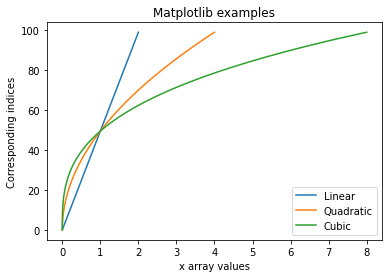

In [34]:
plt.plot(x, y, label='Linear')
plt.plot(x2, y, label='Quadratic')
plt.plot(x3, y,label='Cubic')
plt.xlabel('x array values')
plt.ylabel('Corresponding indices')
plt.legend()
plt.title('Matplotlib examples')
plt.show()

### Task 2
Use the Iris dataset to create a scatter plot of 2 of its features. (Hint: Take indices of the features to be plotted as 0 and 1). Use a function formatter to label a colorbar with the correct target names. Scatter and colorbar are functions of matplotlib. The plot should include labels for the x and y axis.

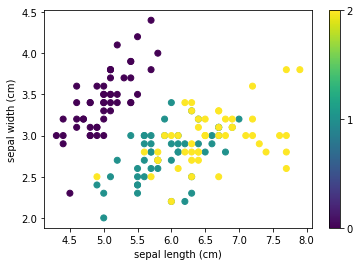

In [48]:
plt.scatter(data.data[:,0], data.data[:,1], c=data.target)
plt.colorbar(ticks=[0,1,2])
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

## K-Means Clustering with scikit learn

### Task 1
K-Means Clustering: K-means clustering is one of the simplest unsupervised machine learning algorithms. A cluster refers to a collection of data points aggregated together because of certain similarities. The task is to apply K-Means clustering on the Iris dataset (ignoring the output labels since clustering is unsupervised). Try K values in the range [1,..,10] and plot a graph of Error vs No. of Clusters. Based on the results of your plot, find the appropriate value of K (assuming no prior knowledge of class information). Error for a single K value can be calculated by below piece of code. 

***cluster  = KMeans(n_clusters = K).fit(x)***

***Error = cluster.inertia_***

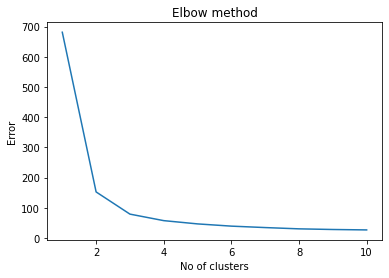

Based on the graph the appropriate K value should be 4


In [52]:
from sklearn.cluster import KMeans

error = []

for i in range(1, 11):
  cluster = KMeans(n_clusters=i).fit(X)
  error.append(cluster.inertia_)

plt.plot(range(1,11), error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
print("Based on the graph the appropriate K value should be 3 following the Elbow Method")

## KNN

### Task 2

K-Nearest Neighbor KNN is a simple supervised classification algorithm used to assign a class label to a new data point. KNN does not make any assumptions on the data distribution, hence it is non-parametric. It requires all the training data to make future predictions by computing the distance (similarity) between an input test sample and each of the training data samples. Scikit-learn has an inbuilt class for performing KNN.The documentation is here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
Perform KNN on the Iris dataset as follows. Split the data into train and test sets. Fit and test the model for different values of `k' (number of neighbors). Take 'k' in a range of [1,2,3...24,25] and record the testing accuracy for each value of k in a list. Plot all the values of testing accuracy against the value of k.

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

scores_list = []
for k in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))


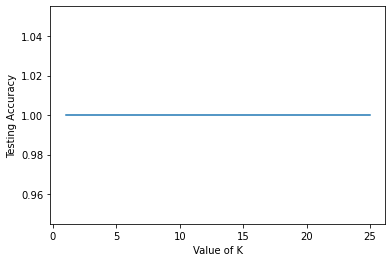

In [66]:
plt.plot(range(1,26), scores_list)
plt.xlabel('Value of K')
plt.ylabel("Testing Accuracy")
plt.show()

## SVM on MNIST

### Task 3

Support Vector Machine (SVM) is a linear model for classification (or regression) that works well for many applications and can be extended to deal with non-linear problems. SVC is a class created by scikit-learn which is capable of performing binary and multi-class classification on a dataset with linear or radial kernels. The implementation of this class is based on libsvm which is a library for support vector machines. Its documentation is found here https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm. SVC Perform SVM classification on the MNIST dataset using the SVC function. MNIST is a popular dataset in computer vision consisting of handwritten digits. It has 10 classes, corresponding to digits from 0 to 9. The mnist train.csv file contains 60,000 training examples and labels. The mnist test.csv contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel grayscale values (a number from 0 to 255). Load these using pandas. Separate the data and labels from the train and test set using the drop function as shown below.

***y = train_data['label']***

***X = train_data.drop(columns = 'label')***

Perform scaling and normalization on the data in the pre-processing step. Perform classification using SVC with the kernel set to linear. Use the default values for the remaining parameters. Print the test accuracy and confusion matrix.

In [75]:
import pandas as pd

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')


In [76]:
y_train = train_data['label']
X_train = train_data.drop(columns = 'label')
y_test = test_data['label']
X_test = test_data.drop(columns = 'label')

In [77]:
X_train = X_train/255.0
X_test = X_test/255.0

In [78]:
from sklearn.preprocessing import scale
X_train = scale(X_train)
X_test = scale(X_test)

In [79]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
history = model.fit(X_train, y_train)
history

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
y_pred = model.predict(X_test)

In [81]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.928
[[ 953    0    6    2    1    8    6    2    1    1]
 [   0 1118    7    2    0    1    2    1    4    0]
 [   9   12  956   11    9    4    5    5   18    3]
 [   7    1   15  940    0   17    1    6   19    4]
 [   3    2   18    1  927    0    3    6    3   19]
 [   7    6    7   40    5  791   12    1   20    3]
 [  14    3   17    1    9   19  892    0    3    0]
 [   2    8   23   14   11    2    0  945    2   21]
 [  11    7   10   29    8   23    8    6  860   12]
 [   9    7    6   11   38    5    0   23   12  898]]
